In [9]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import datetime
%matplotlib inline

In [18]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2012,12,1)
data = wb.DataReader("AAPL","morningstar",start,end)
ticker = 'AAPL' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='morningstar', start='2007-1-1')['Close']

In [19]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

AAPL
Symbol Date                
AAPL   2018-06-28  0.007250
       2018-06-29 -0.002105
       2018-07-02  0.011120
       2018-07-03 -0.017570
       2018-07-04  0.000000

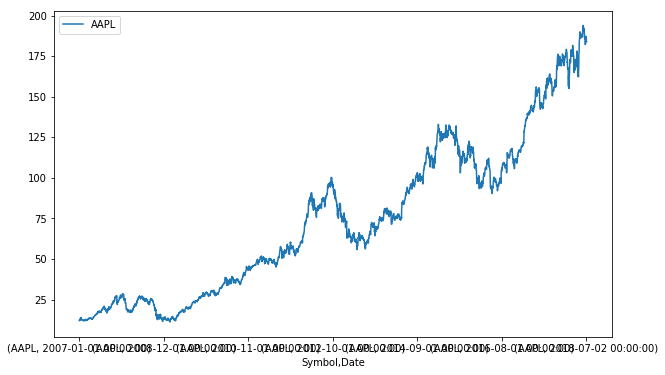

In [20]:
data.plot(figsize=(10, 6));

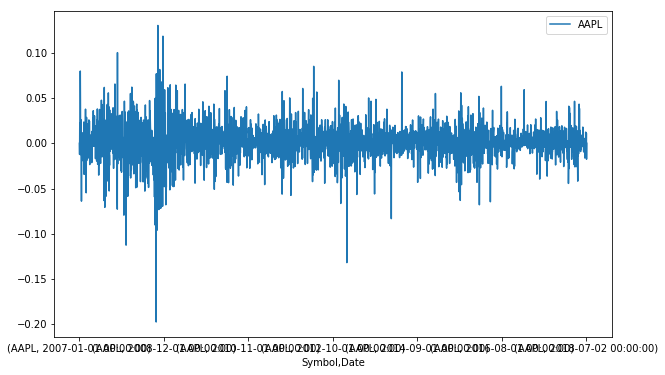

In [21]:
log_returns.plot(figsize = (10, 6))

In [22]:
u = log_returns.mean()
u

AAPL    0.000906
dtype: float64

In [23]:
var = log_returns.var()
var

AAPL    0.000382
dtype: float64

In [24]:
drift = u - (0.5 * var)
drift

AAPL    0.000715
dtype: float64

In [25]:
stdev = log_returns.std()
stdev

AAPL    0.019556
dtype: float64

In [26]:
type(drift)

pandas.core.series.Series

In [27]:
type(stdev)

pandas.core.series.Series

In [28]:
np.array(drift)

array([ 0.00071472])

In [29]:
drift.values

array([ 0.00071472])

In [30]:
stdev.values

array([ 0.01955618])

In [102]:
norm.ppf(0.999)

3.0902323061678132

In [103]:
x = np.random.rand(10, 2)
x

array([[ 0.02162401,  0.39114895],
       [ 0.78608231,  0.46767766],
       [ 0.82776438,  0.55659956],
       [ 0.53578255,  0.20925514],
       [ 0.38876897,  0.89651142],
       [ 0.33107331,  0.06075591],
       [ 0.57730608,  0.42925389],
       [ 0.30880651,  0.85137656],
       [ 0.43905754,  0.48397453],
       [ 0.82829389,  0.62005678]])

In [104]:
norm.ppf(x)

array([[-2.02130684, -0.27632572],
       [ 0.79290123, -0.08110893],
       [ 0.94536758,  0.14235338],
       [ 0.08981414, -0.80900846],
       [-0.28252897,  1.26192115],
       [-0.43695135, -1.54845899],
       [ 0.19500652, -0.17827403],
       [-0.49923618,  1.04235551],
       [-0.15335912, -0.04018071],
       [ 0.9474447 ,  0.30562992]])

In [105]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[  1.25201947e+00,  -6.31163881e-01],
       [ -7.18222211e-01,  -3.46789992e-01],
       [  1.71069892e-01,   6.14585826e-02],
       [  3.14042202e+00,  -2.03430055e-01],
       [  1.11630075e+00,  -4.35757545e-01],
       [  2.34102897e-03,   3.12853907e-01],
       [ -1.06941803e+00,  -7.70123672e-01],
       [  4.30696919e-01,  -3.68035908e-01],
       [  1.41576734e+00,  -6.22347645e-01],
       [  2.42547129e-01,  -6.45898229e-02]])

In [106]:
t_intervals = 100
iterations = 5

In [107]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [108]:
S0 = data.iloc[-1]
S0

AAPL    183.92
Name: (AAPL, 2018-07-04 00:00:00), dtype: float64

In [109]:
price_list = np.zeros_like(daily_returns)

In [110]:
price_list[0] = S0

In [111]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [112]:
price_list

array([[ 183.92      ,  183.92      ,  183.92      ,  183.92      ,  183.92      ],
       [ 188.24433709,  186.34081581,  183.44264973,  184.58929094,
         183.80925726],
       [ 185.01736408,  189.17120689,  186.69772353,  187.64248935,
         180.53771483],
       [ 185.35358203,  190.73406226,  178.08062565,  191.54668087,
         177.40679031],
       [ 180.43351037,  188.60761281,  175.97970052,  191.37298759,
         179.90443262],
       [ 175.73356504,  186.77427077,  176.84908903,  187.89248961,
         176.91041668],
       [ 177.38094872,  188.46124171,  177.66461244,  189.18951244,
         175.25541472],
       [ 176.08774824,  193.49108916,  179.25608487,  192.42707386,
         173.96532962],
       [ 177.46304724,  191.74367437,  175.73099896,  192.79548512,
         180.660052  ],
       [ 183.38373158,  188.28846515,  177.66733621,  192.50109879,
         185.06369502],
       [ 191.56104108,  189.64588399,  179.15880312,  198.86027644,
         178.0386699

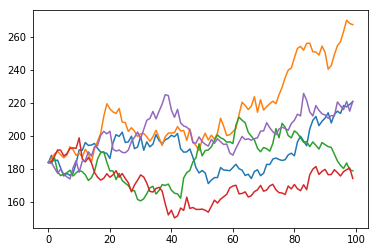

In [114]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(price_list);

In [115]:
dnp=np.array(data)

In [116]:
len(dnp)

3003

In [117]:
t=np.linspace(-3002,0,3003)

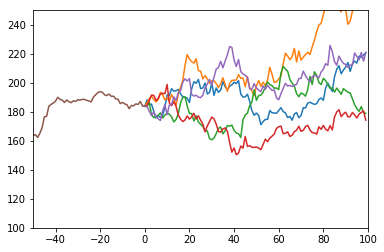

In [118]:

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.xlim(-50,100)
plt.ylim(100,250)
ax.plot(price_list);
ax.plot(t,dnp);